### Part A

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [2]:
import pandas as pd
import numpy as np
import sweetviz as sv
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn import metrics
%matplotlib inline

                                             |      | [  0%]   00:00 -> (? left)


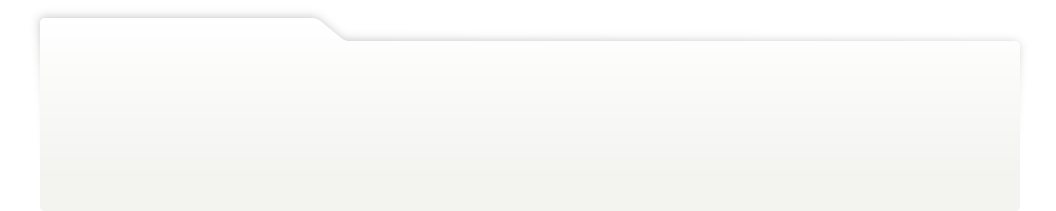
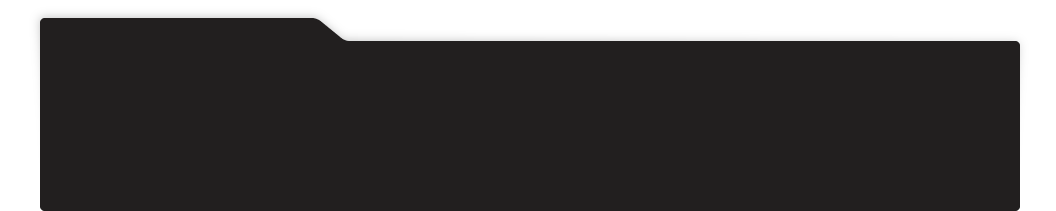
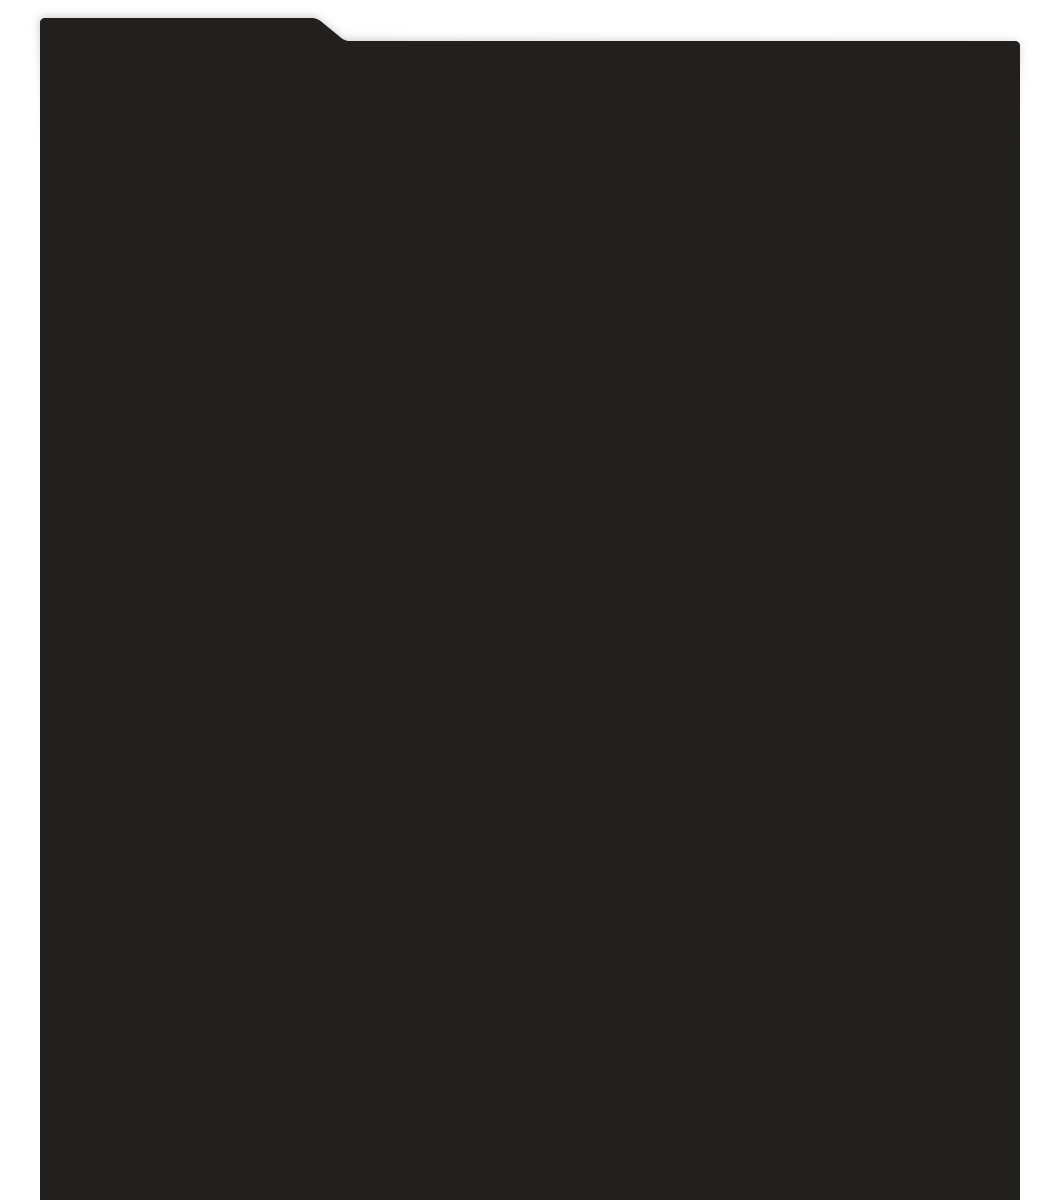
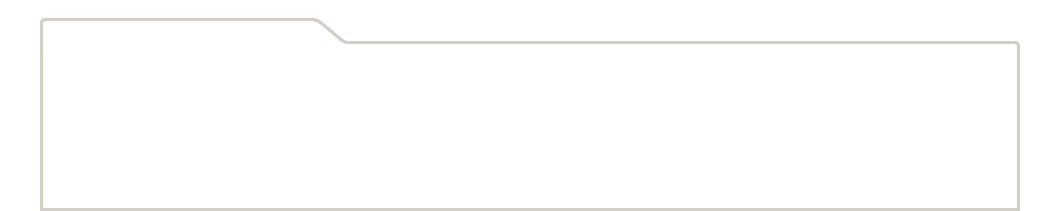
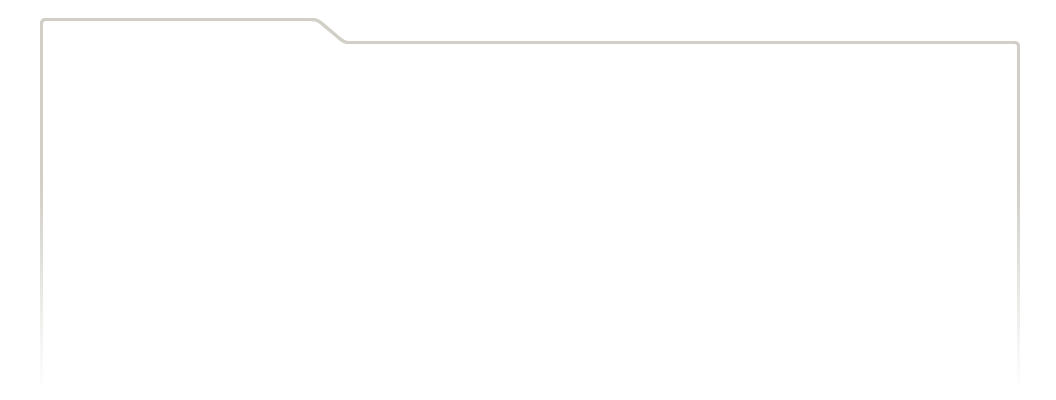
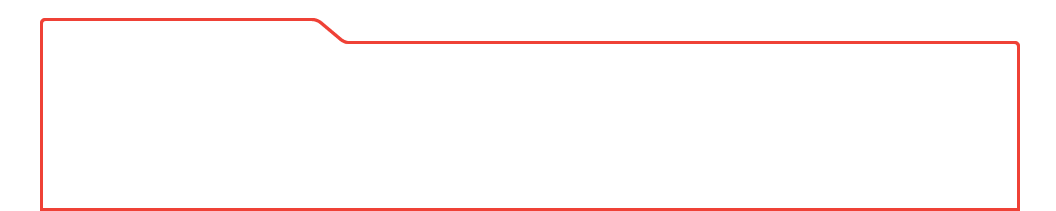
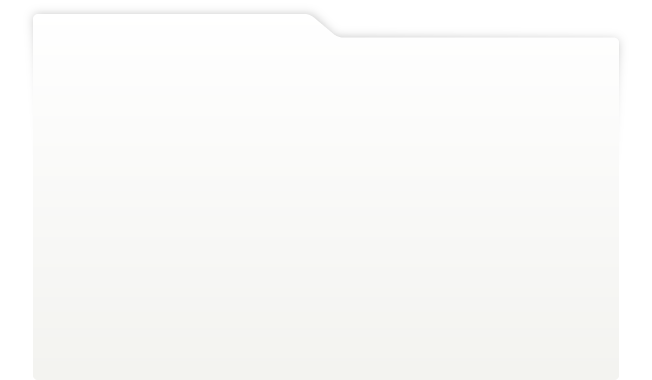
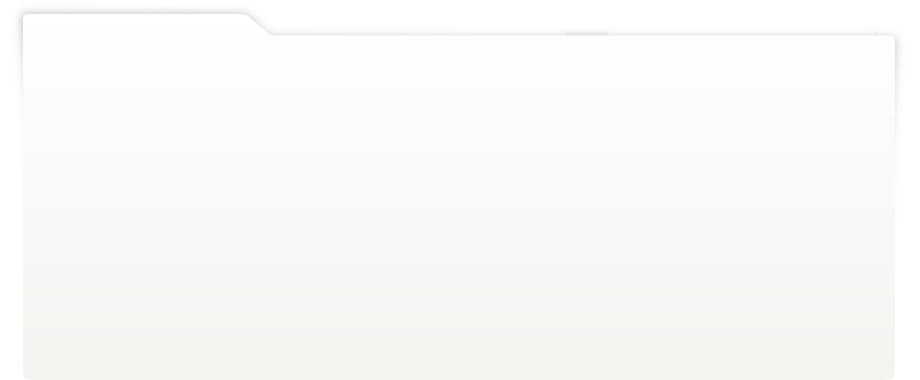
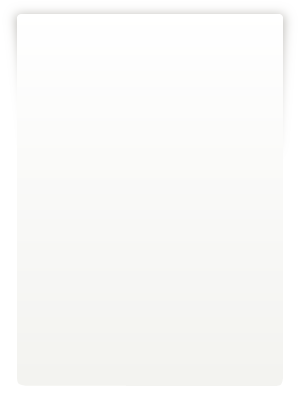
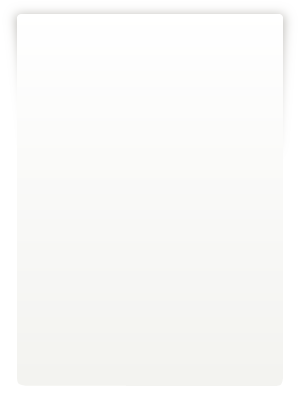
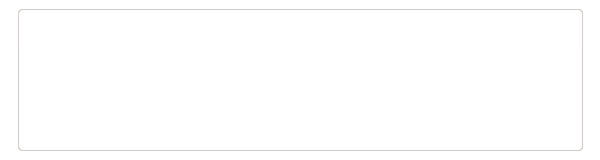
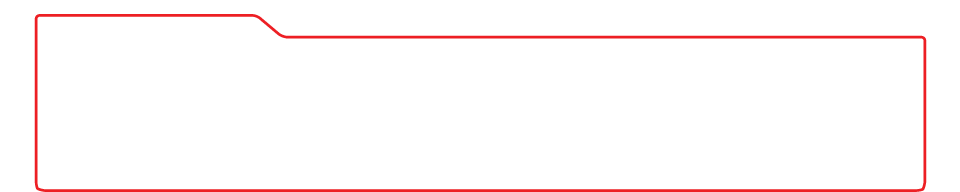
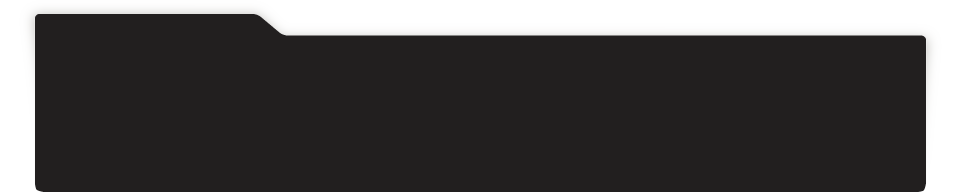
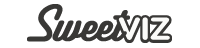
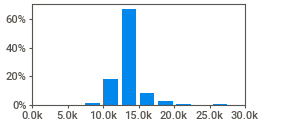
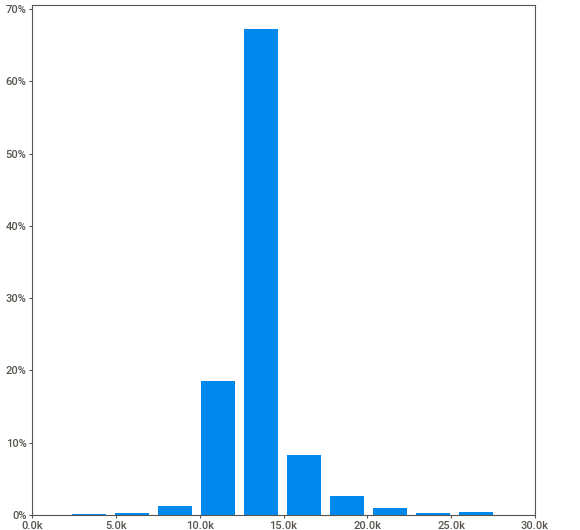
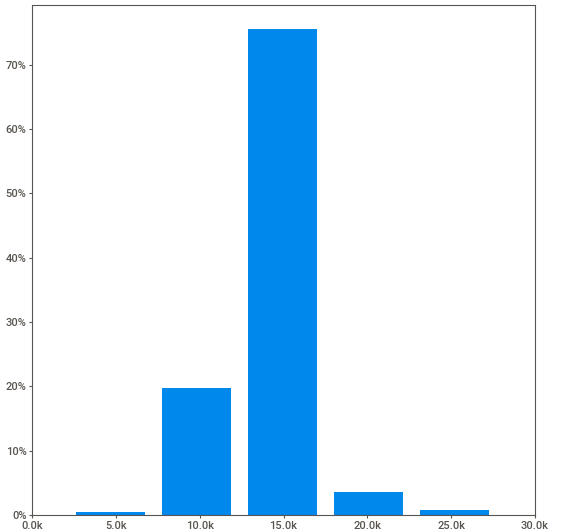
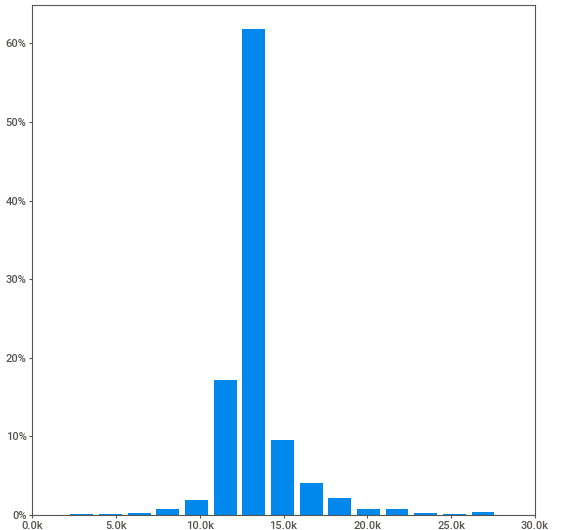
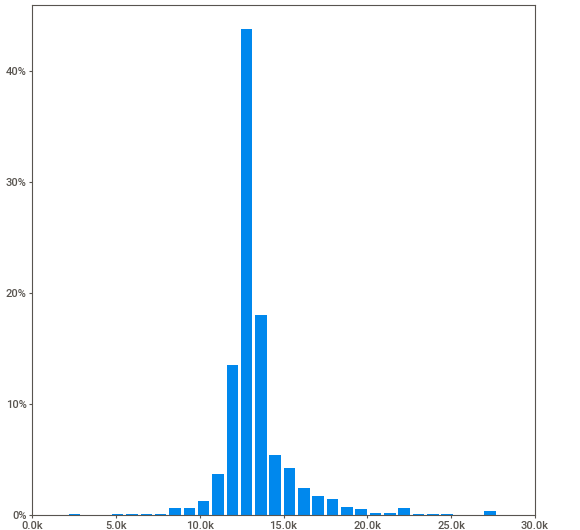
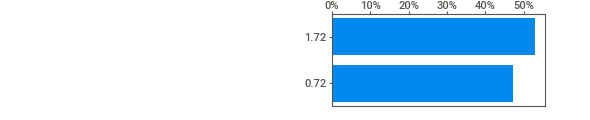
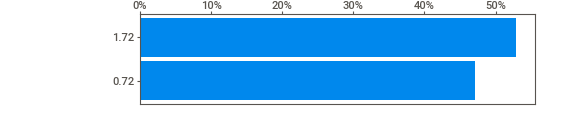
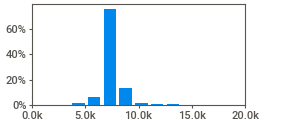
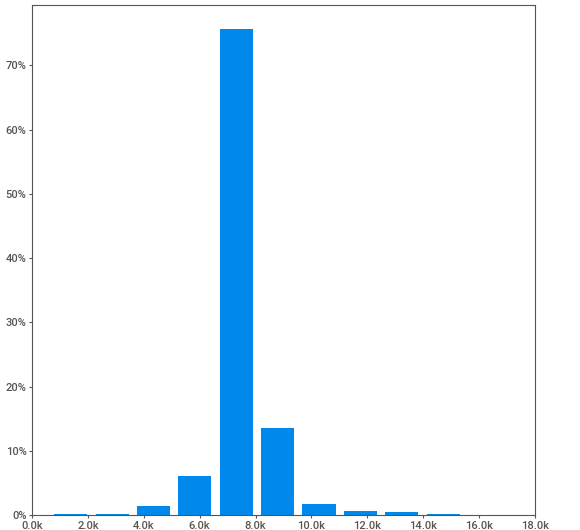
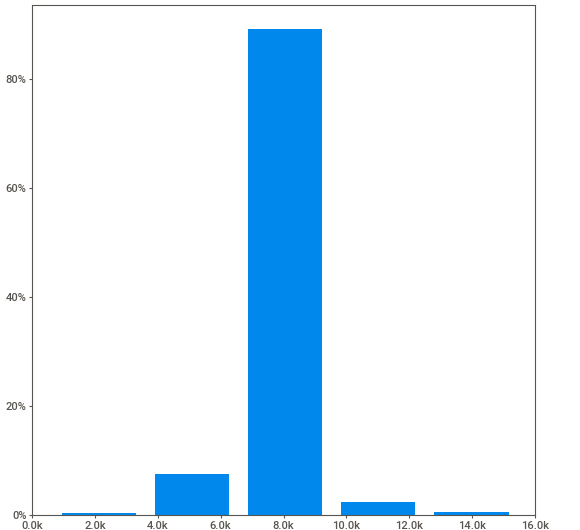
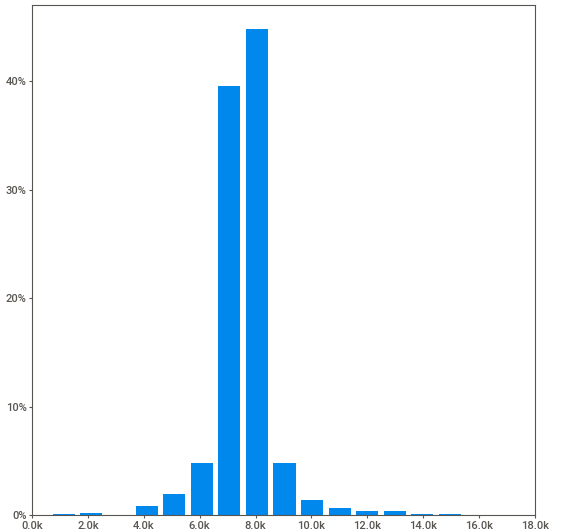
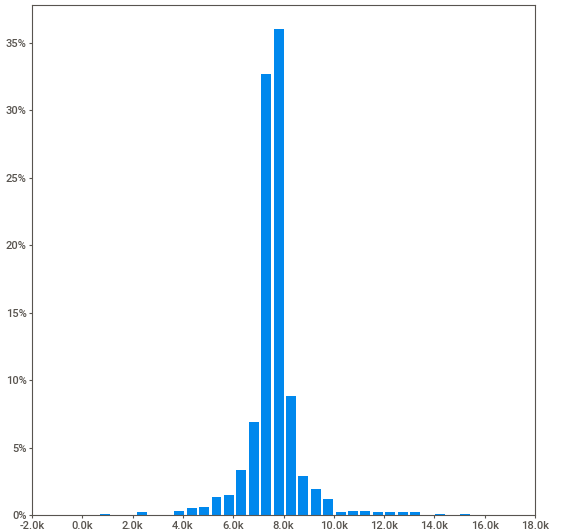
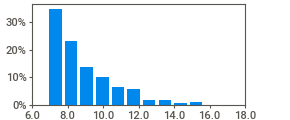
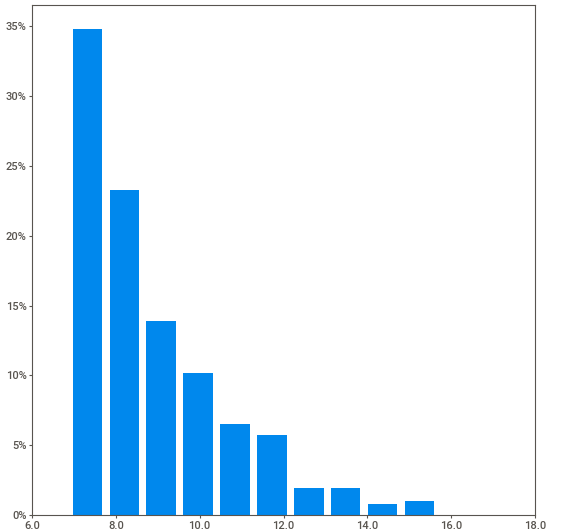
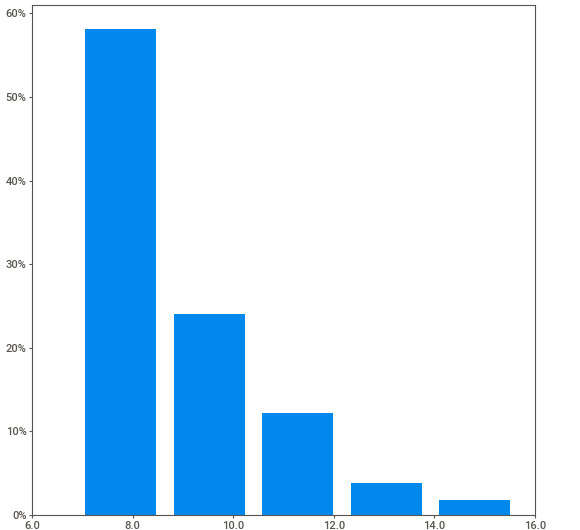
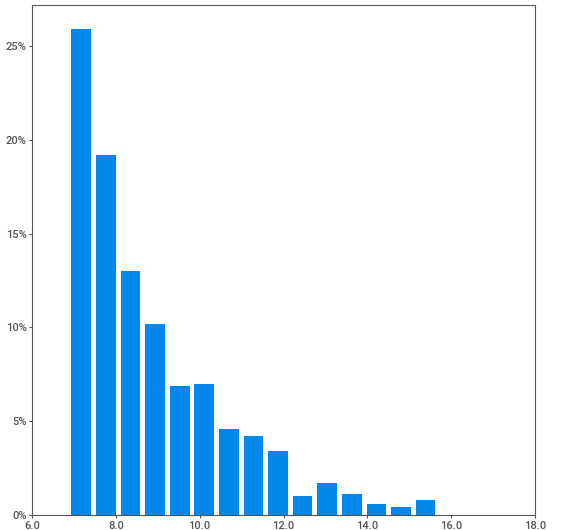
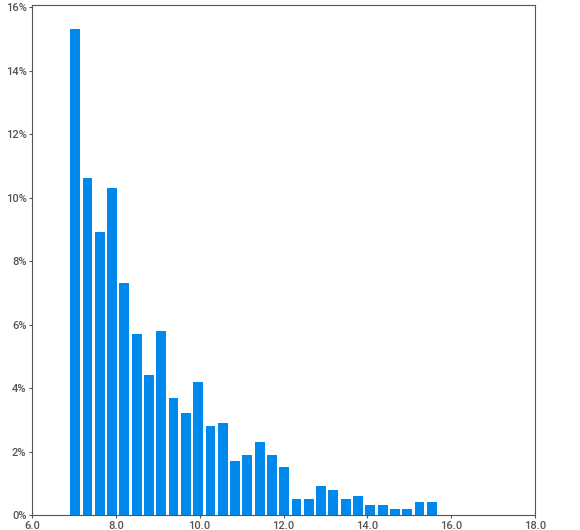
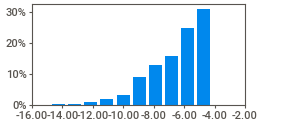
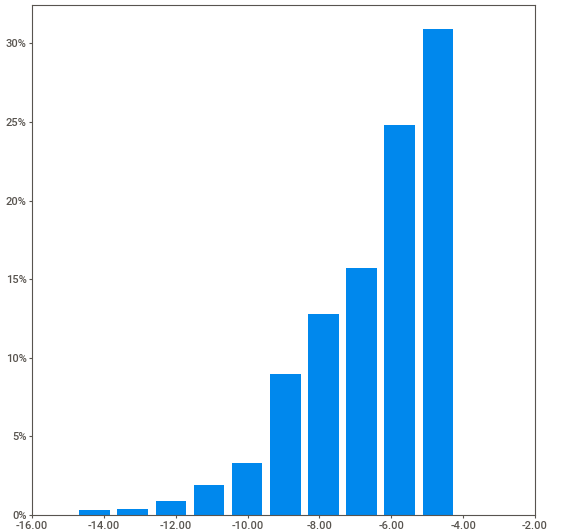
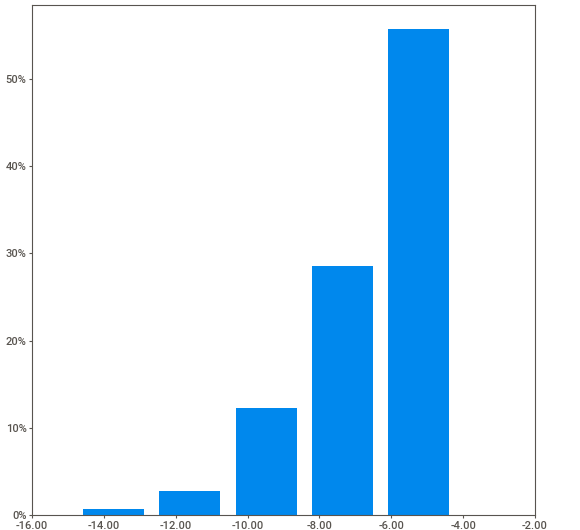
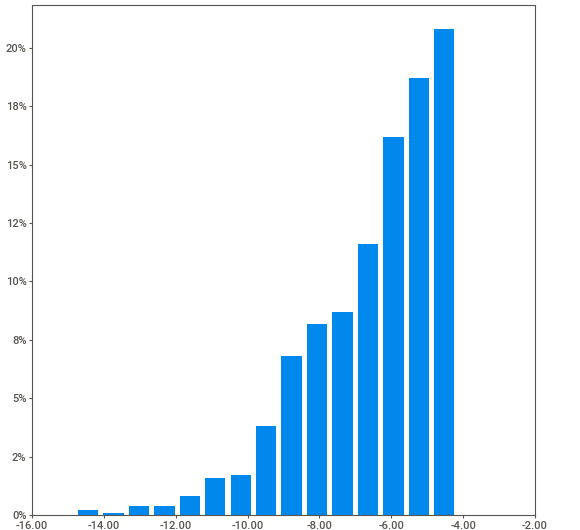
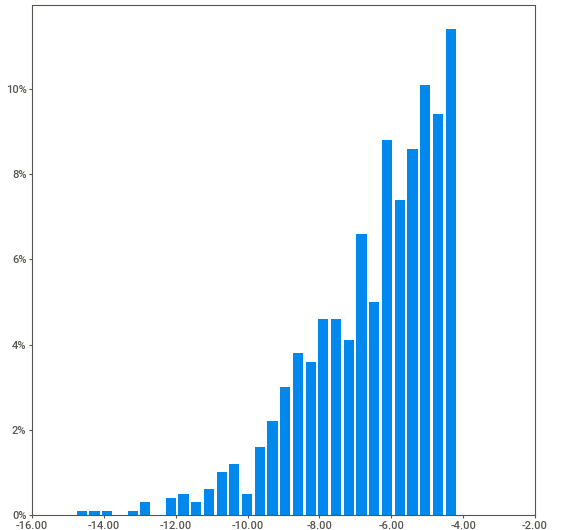
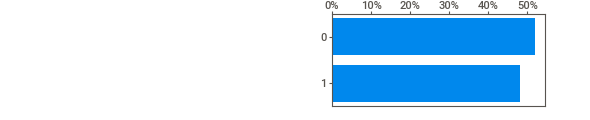
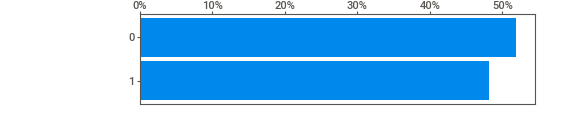
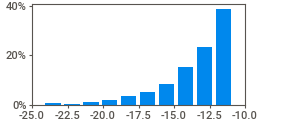
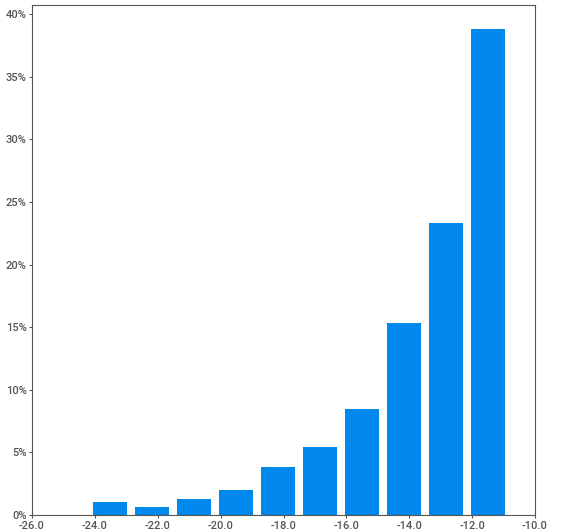
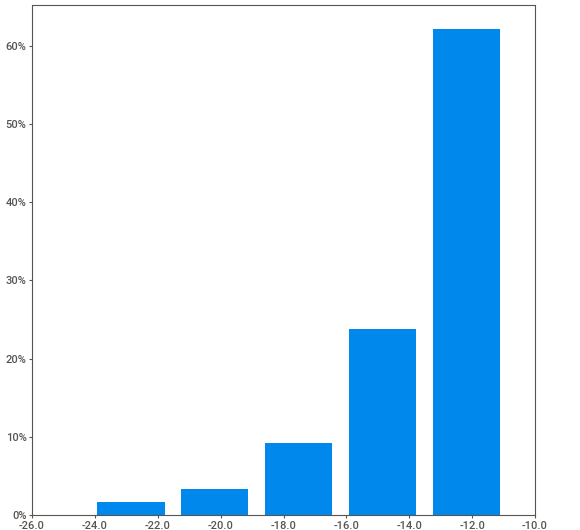
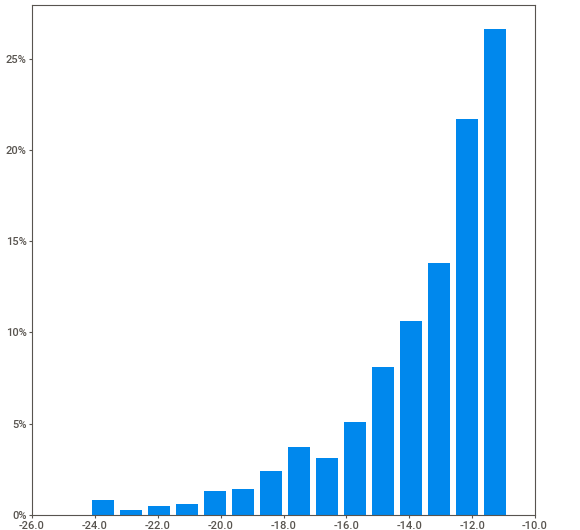
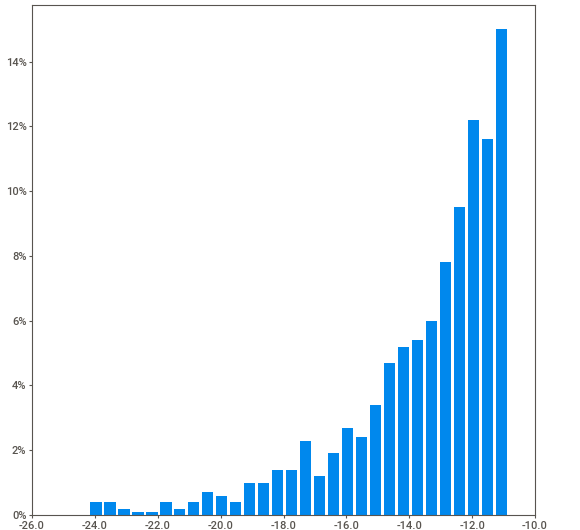
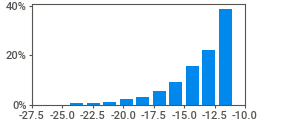
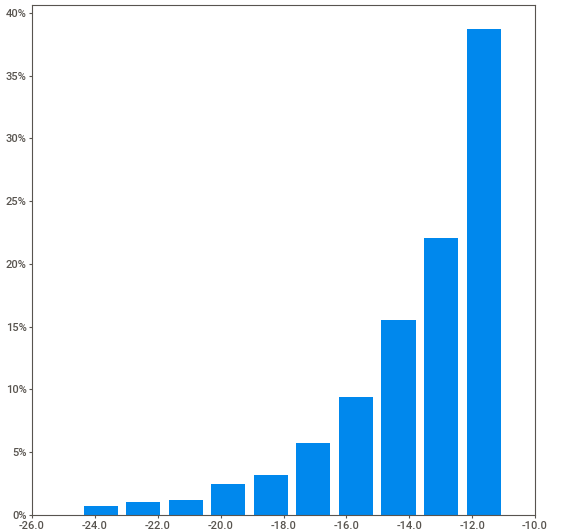
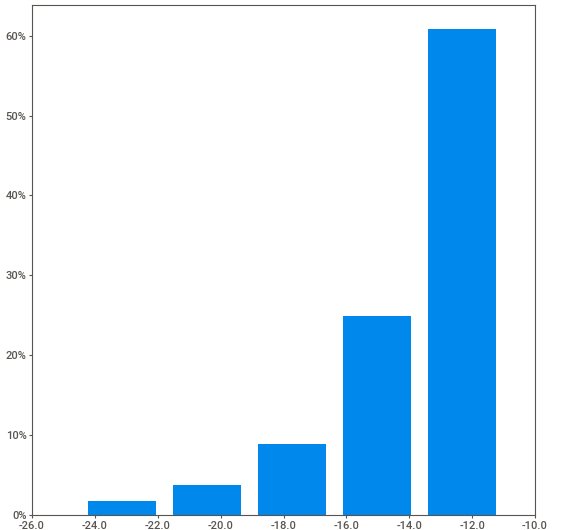
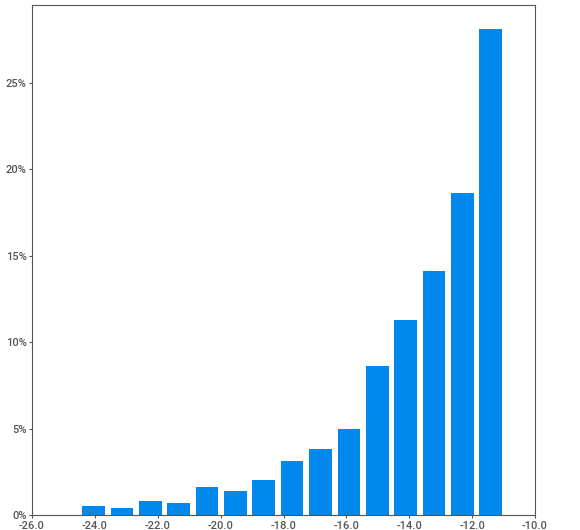
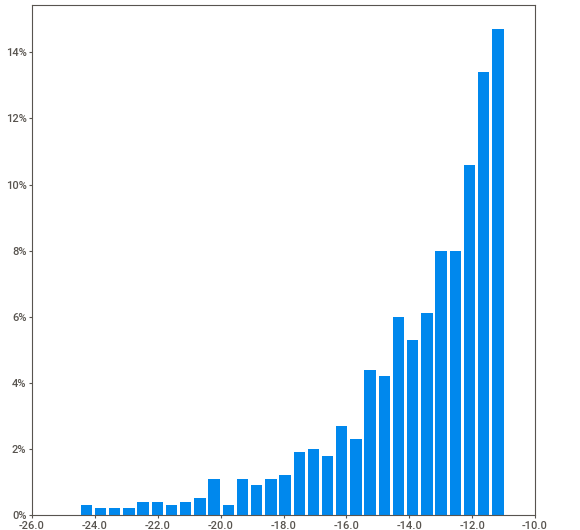
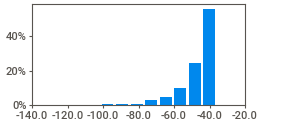
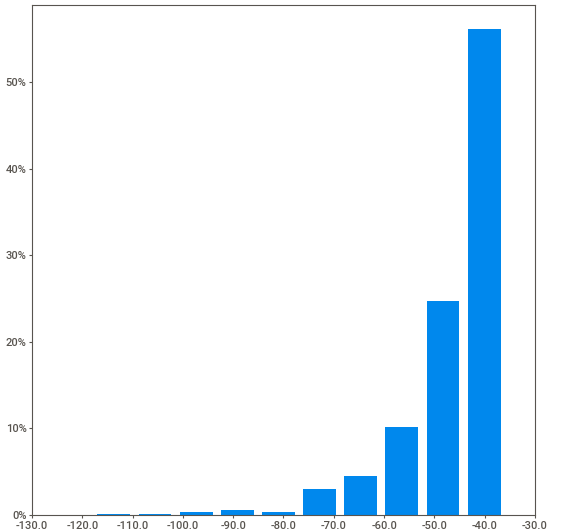
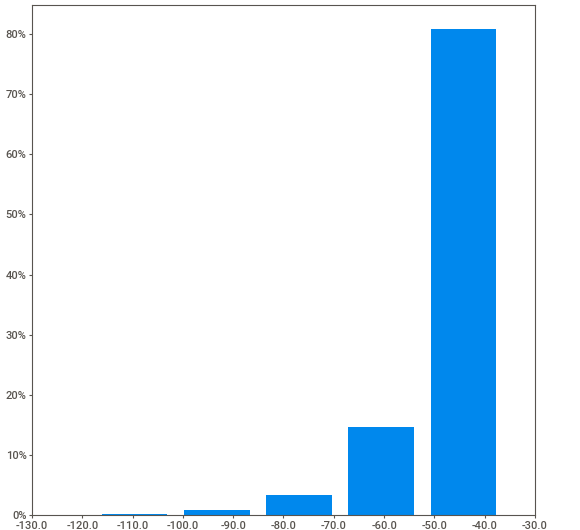
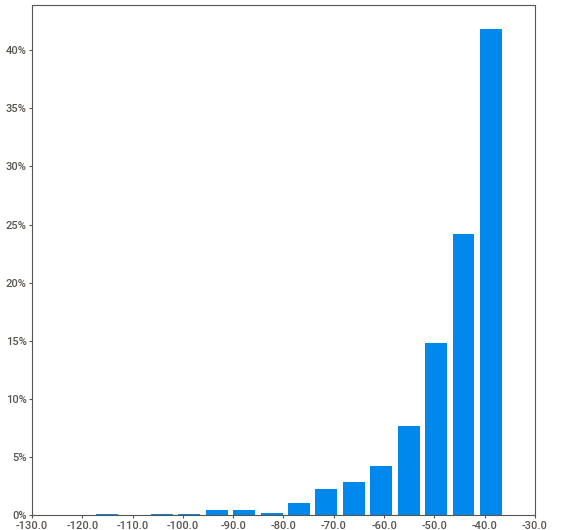
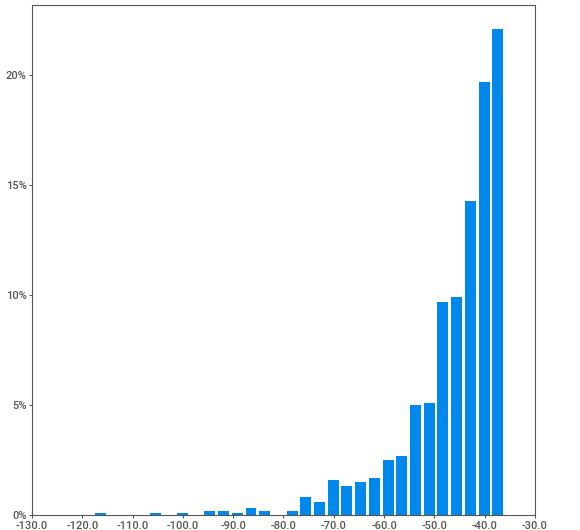
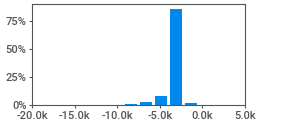
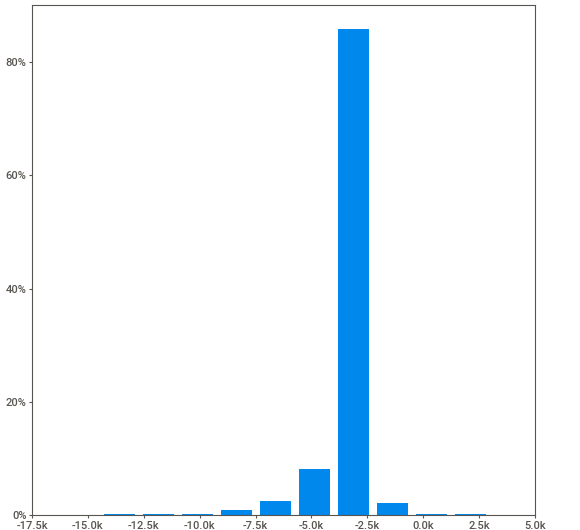
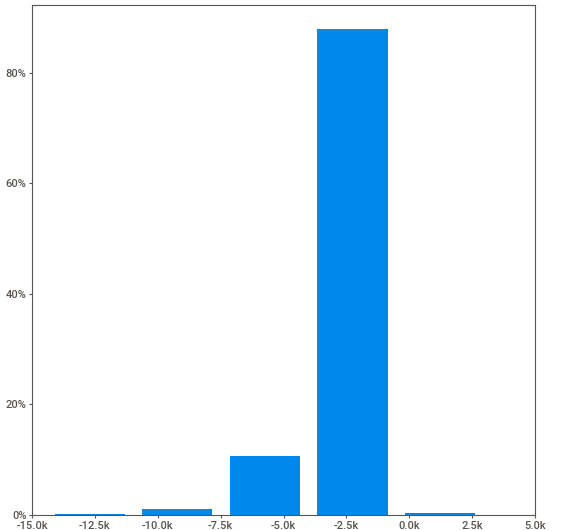
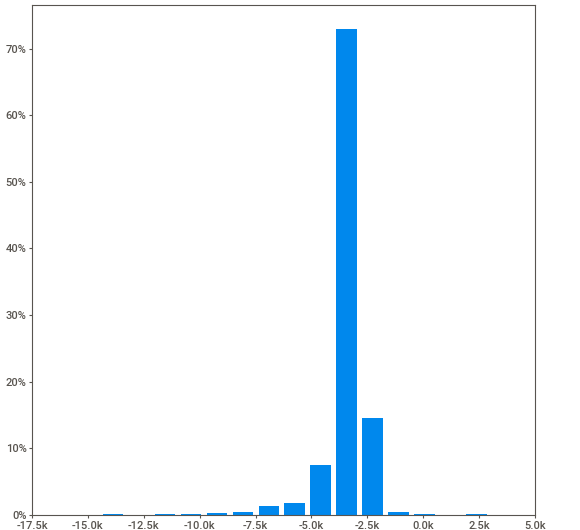
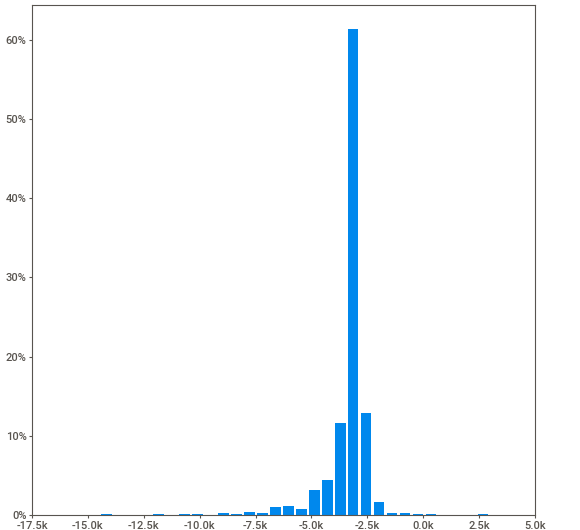
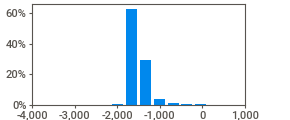
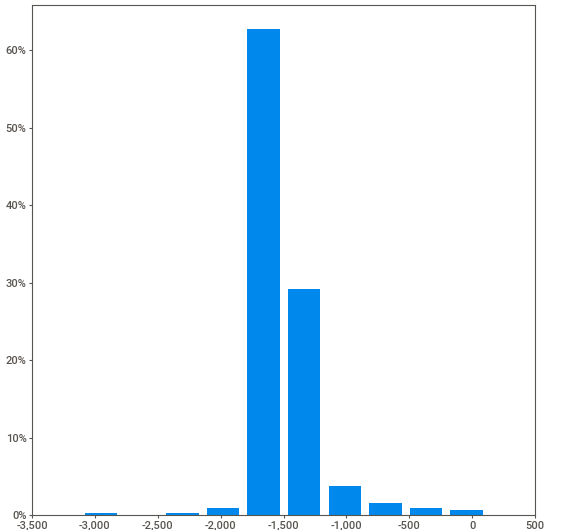
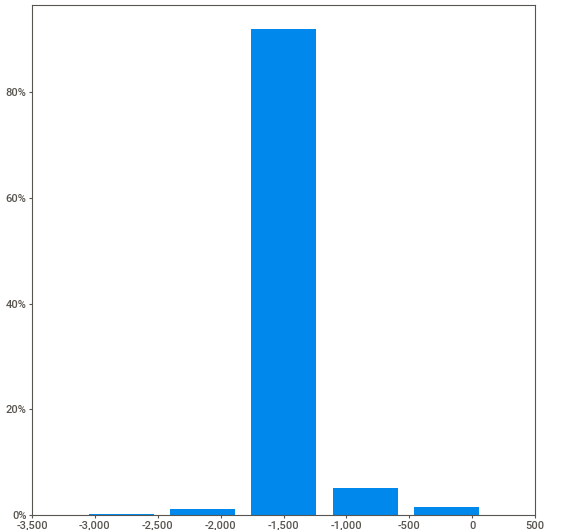
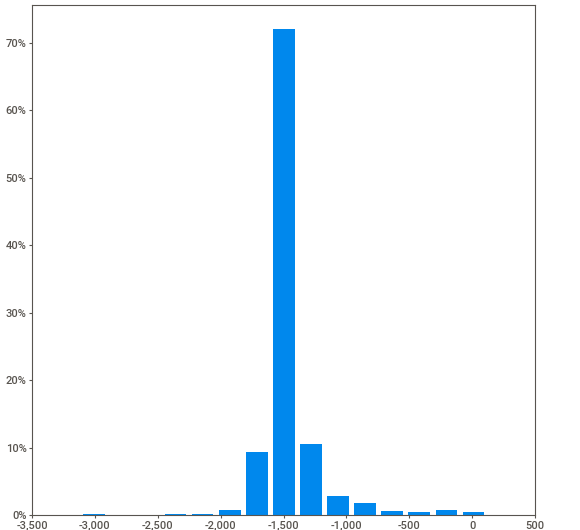
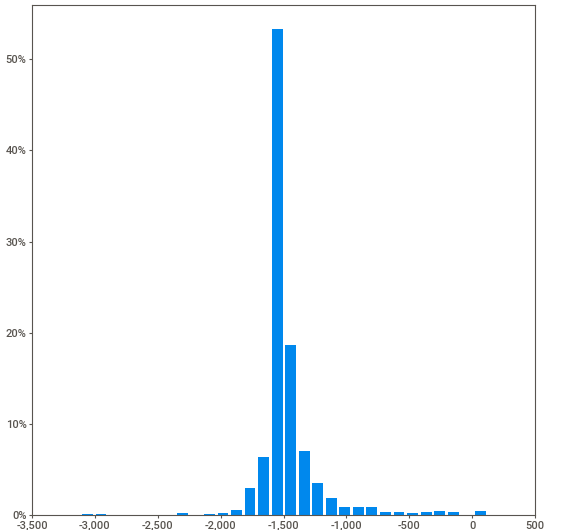
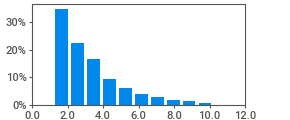
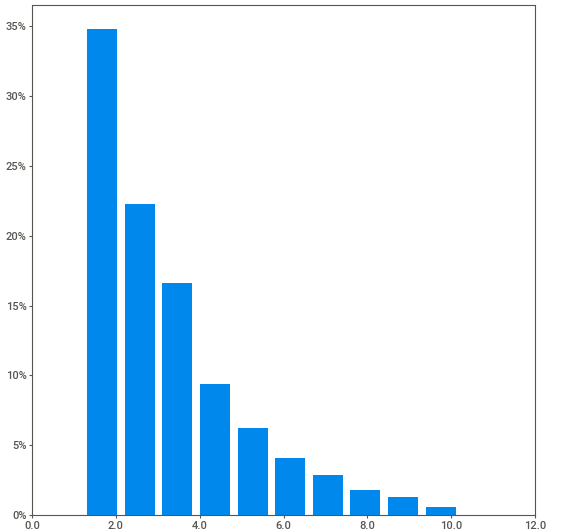
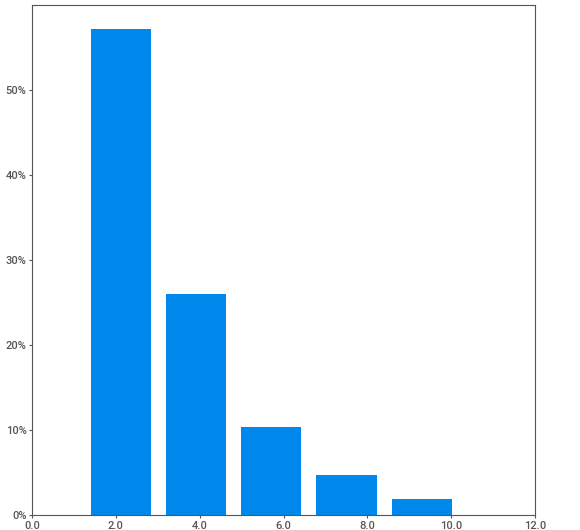
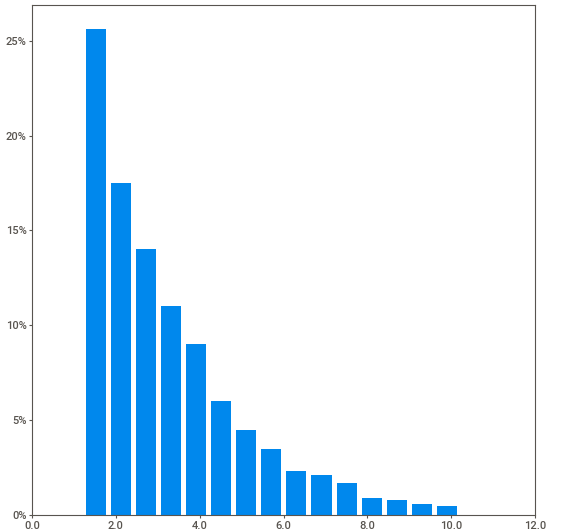
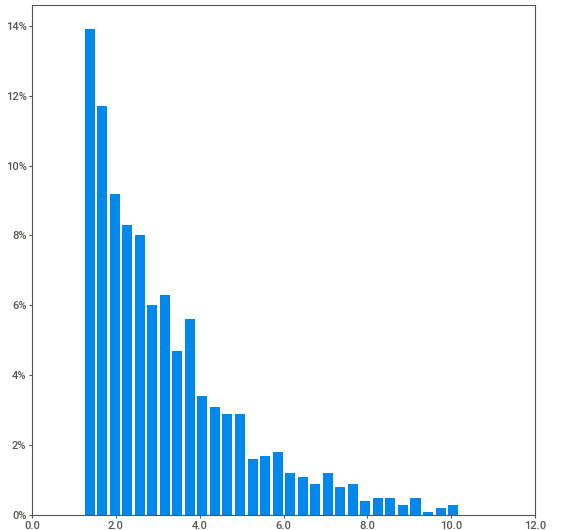
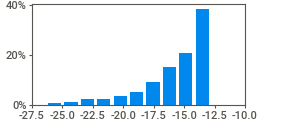
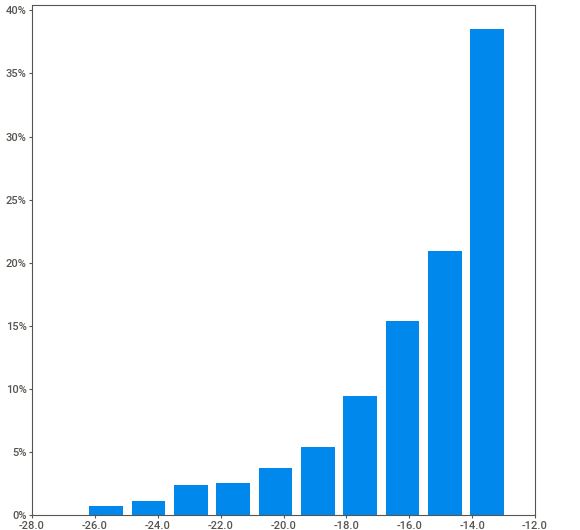
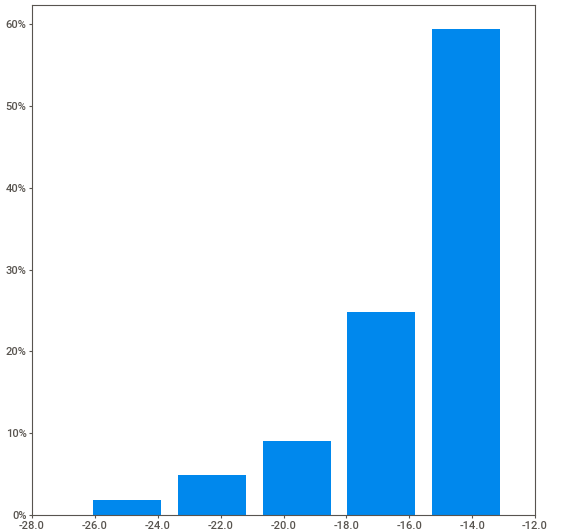
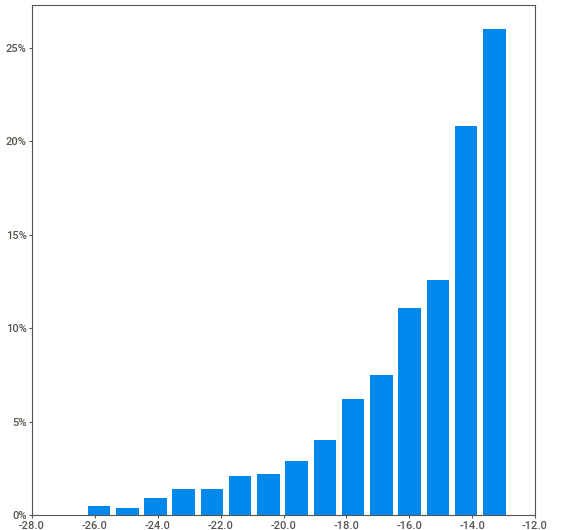
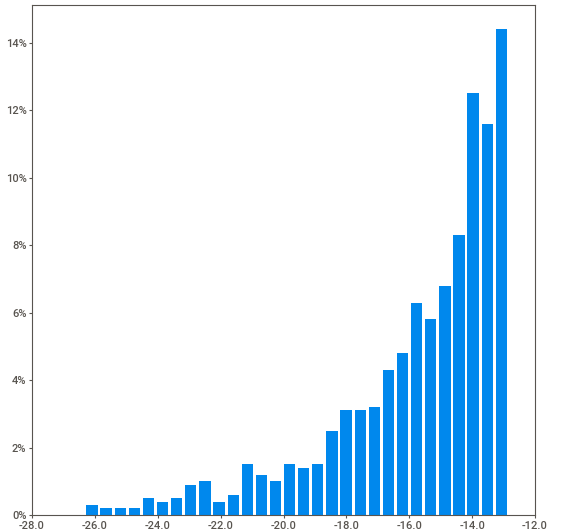
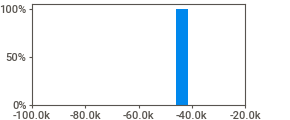
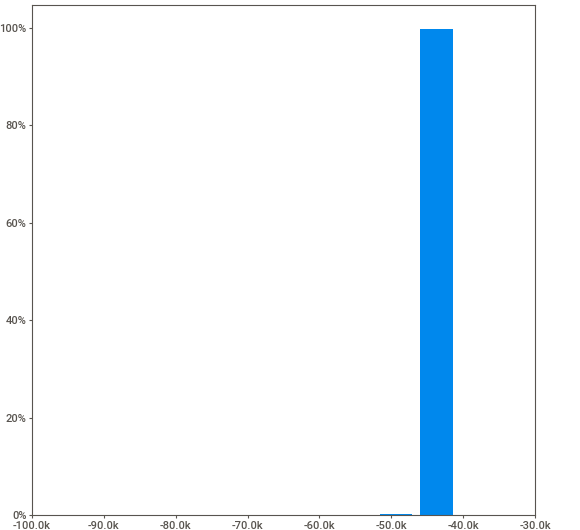
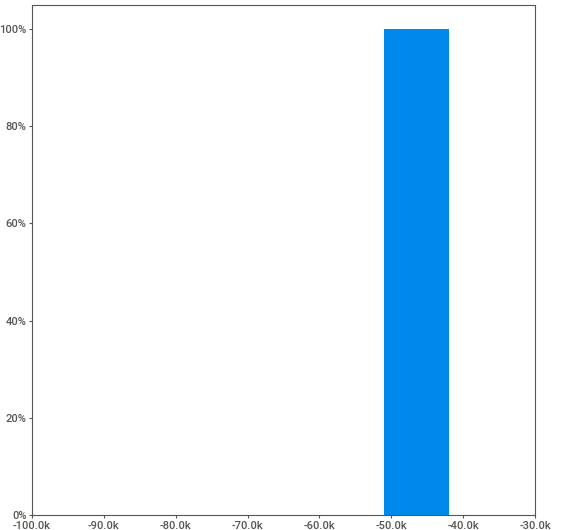
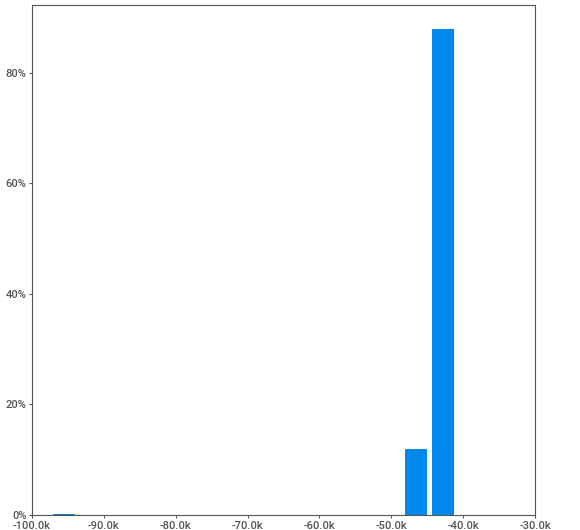
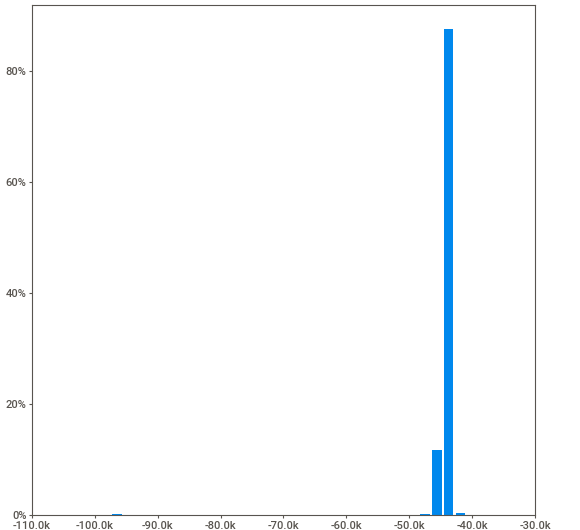
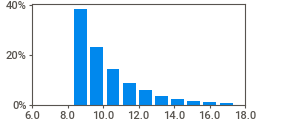
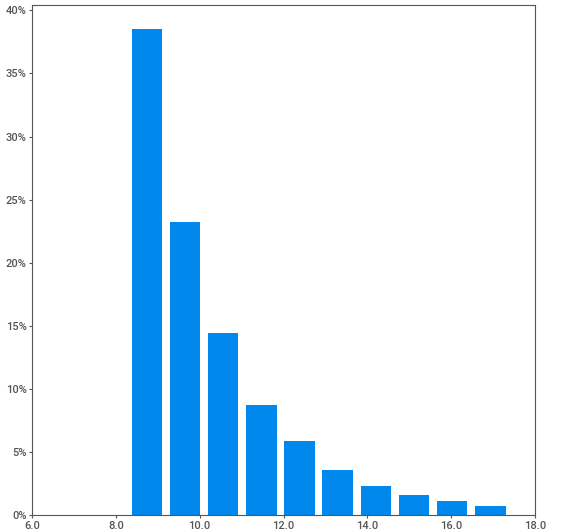
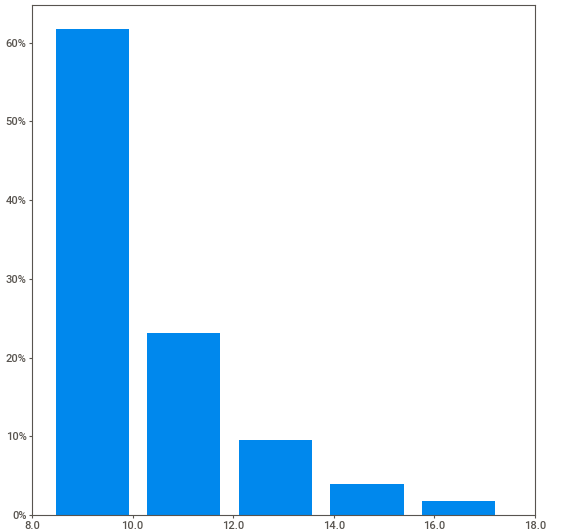
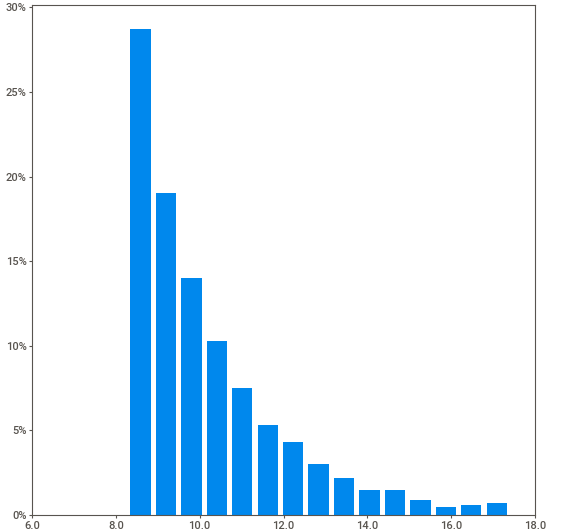
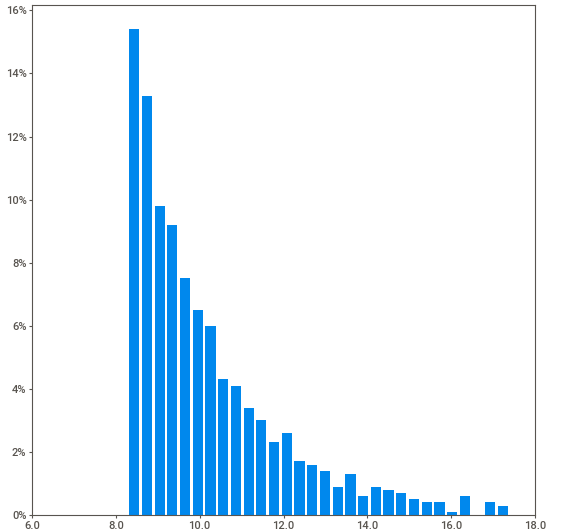
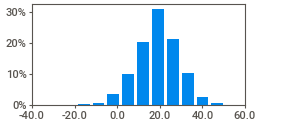
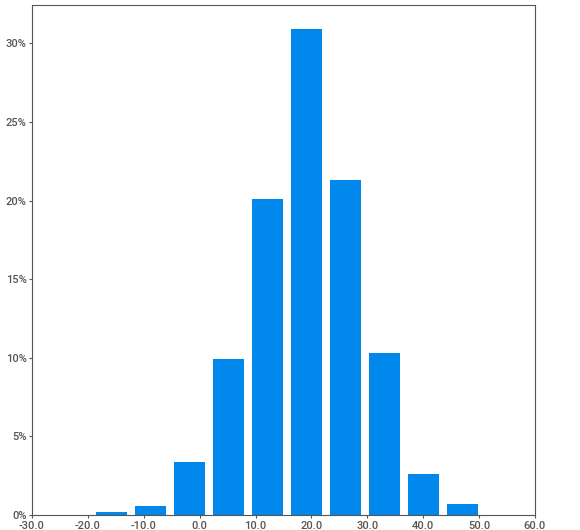
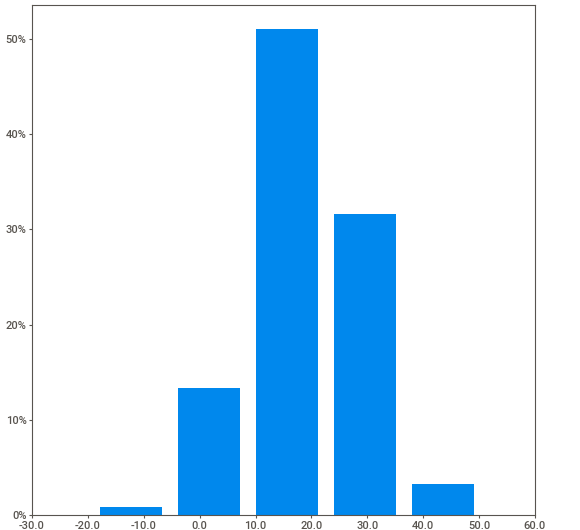
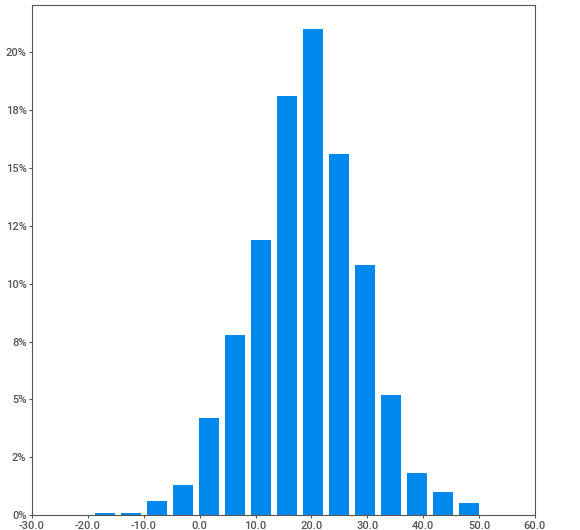
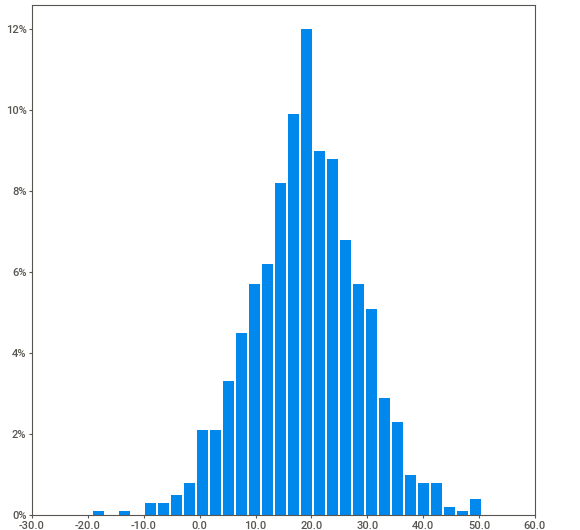
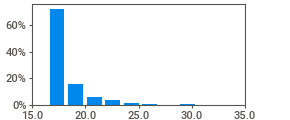
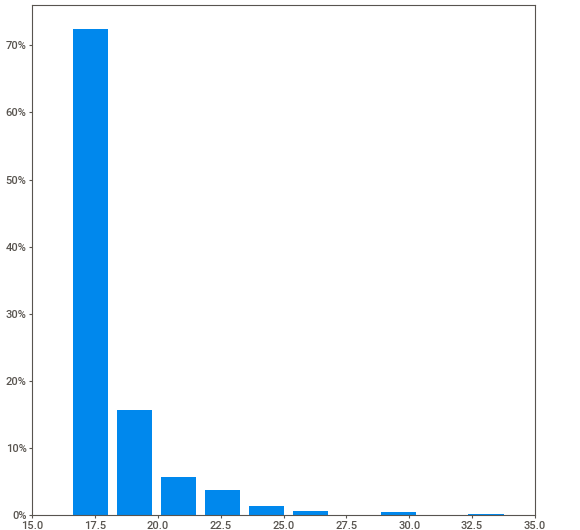
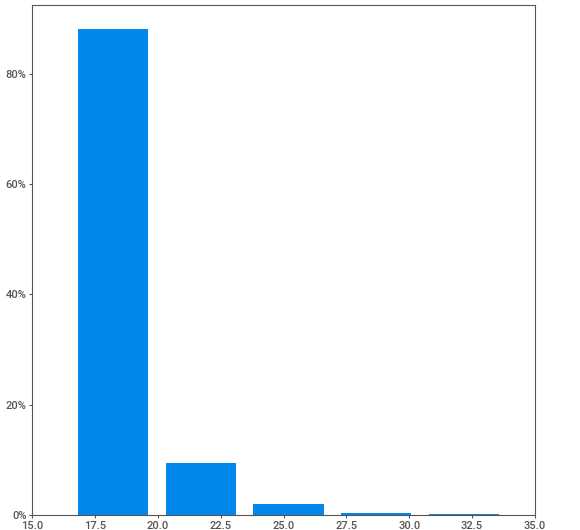
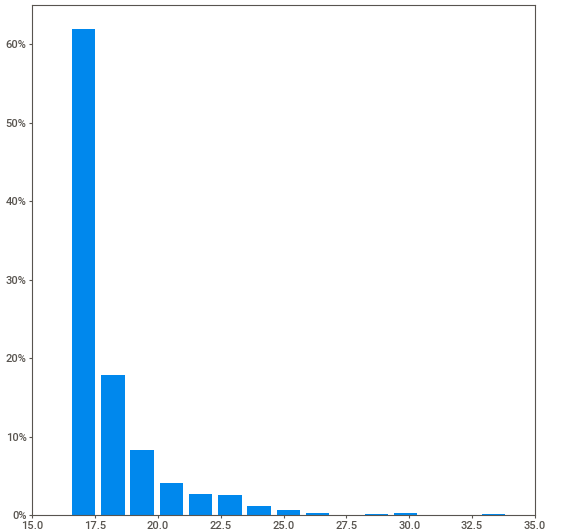
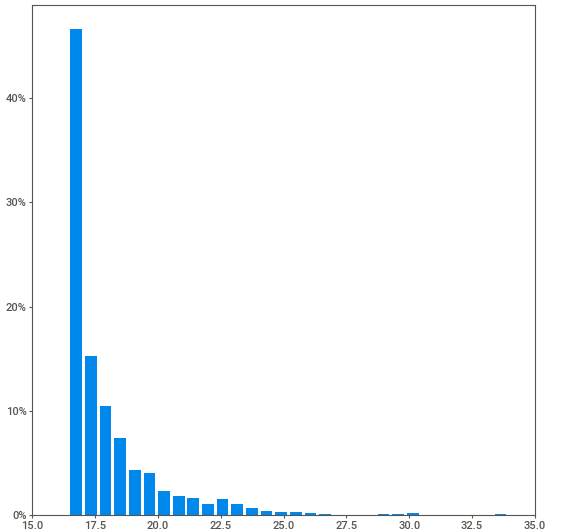
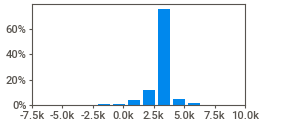
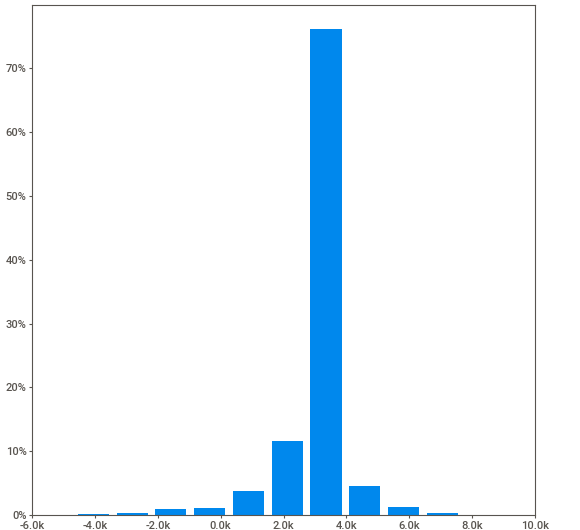
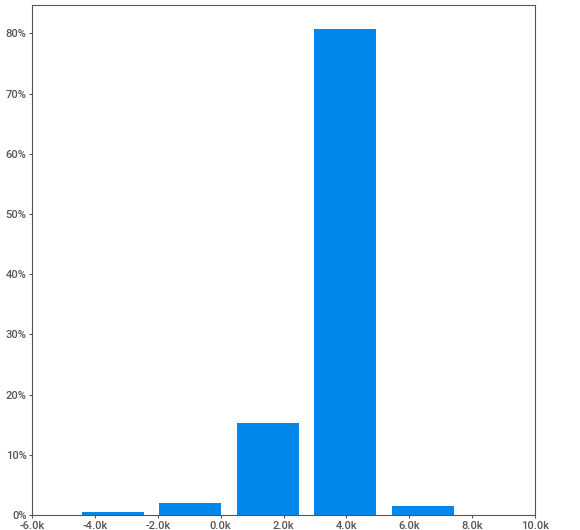
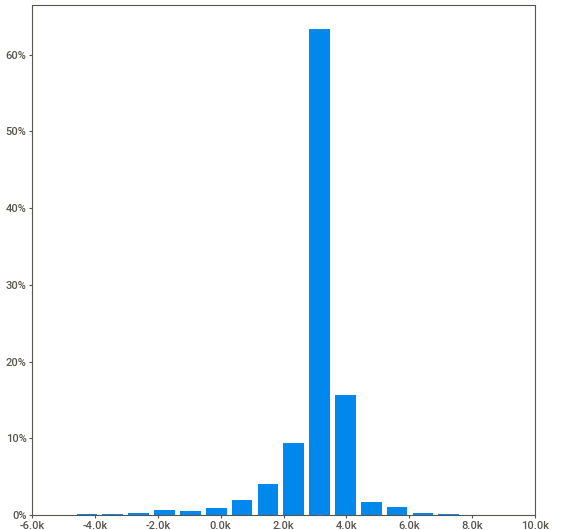
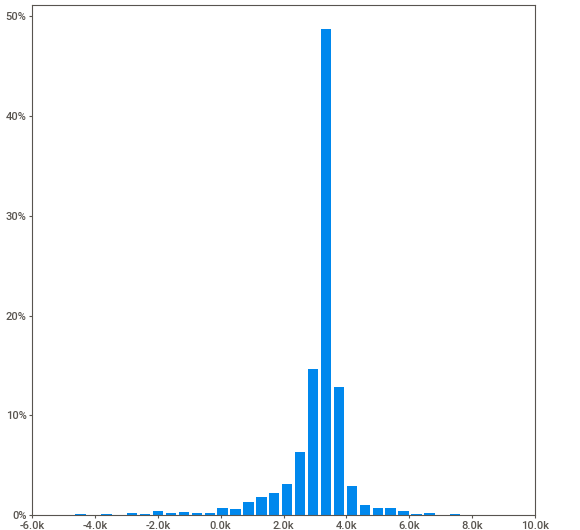
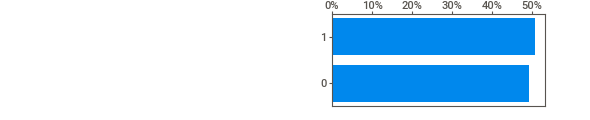
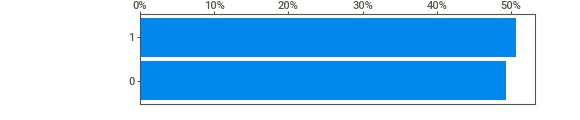
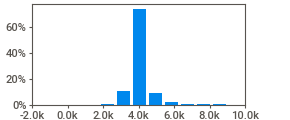
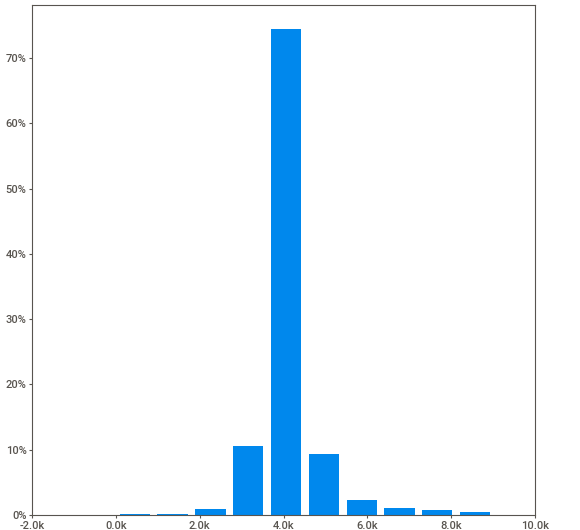
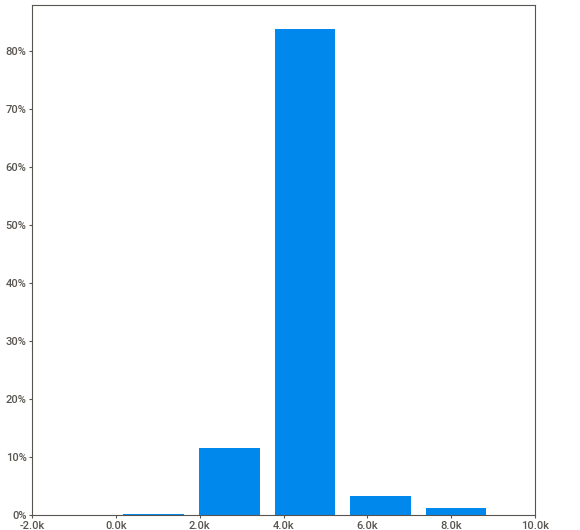
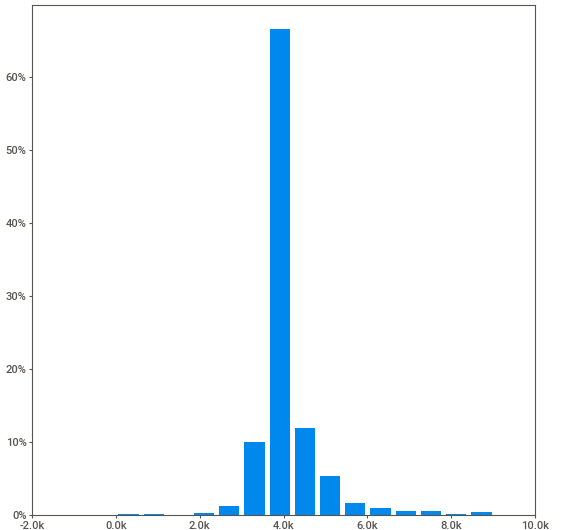
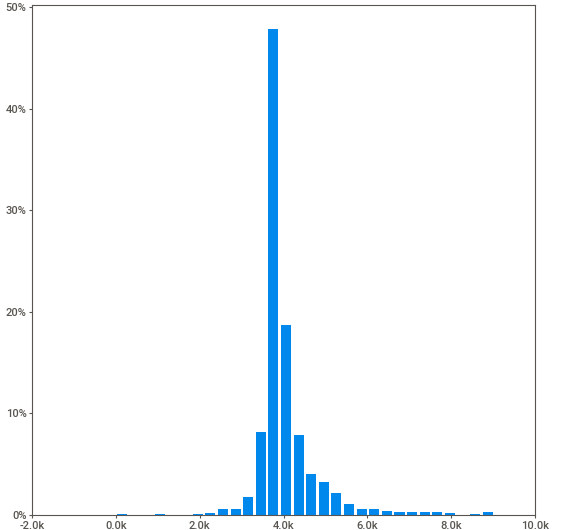
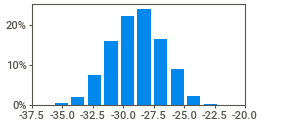
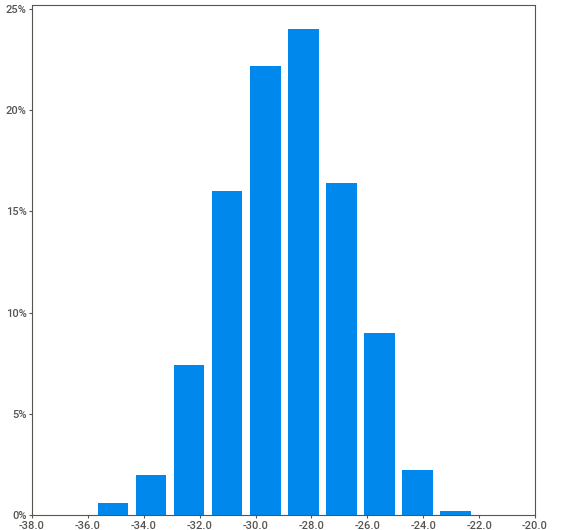
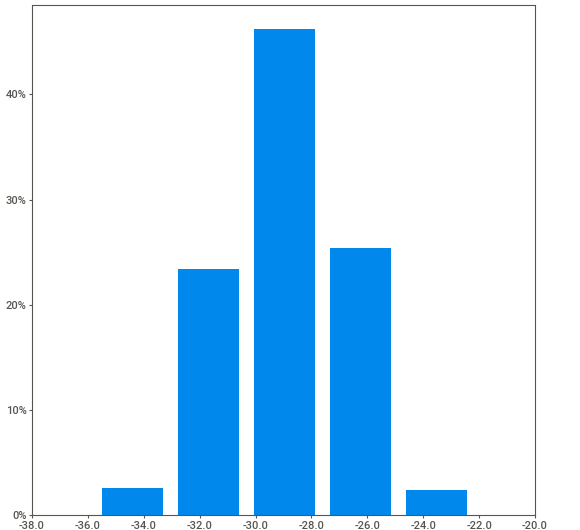
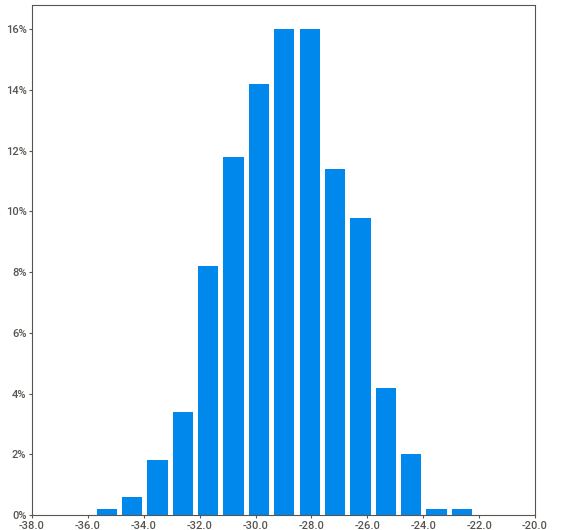
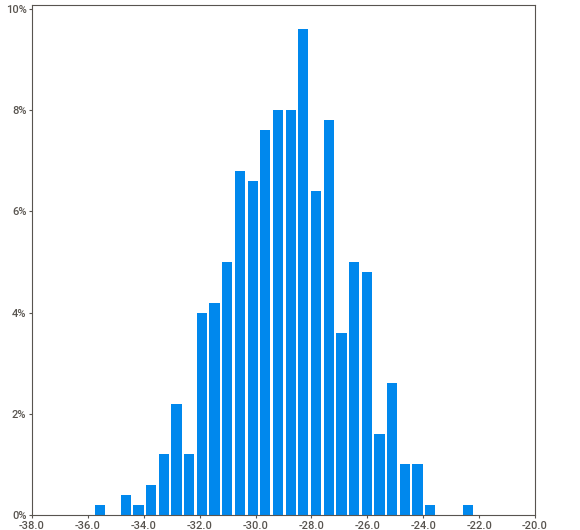
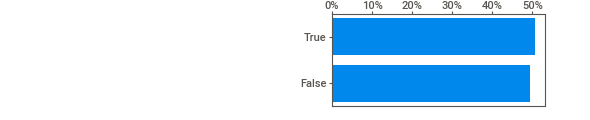
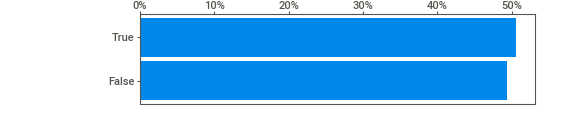
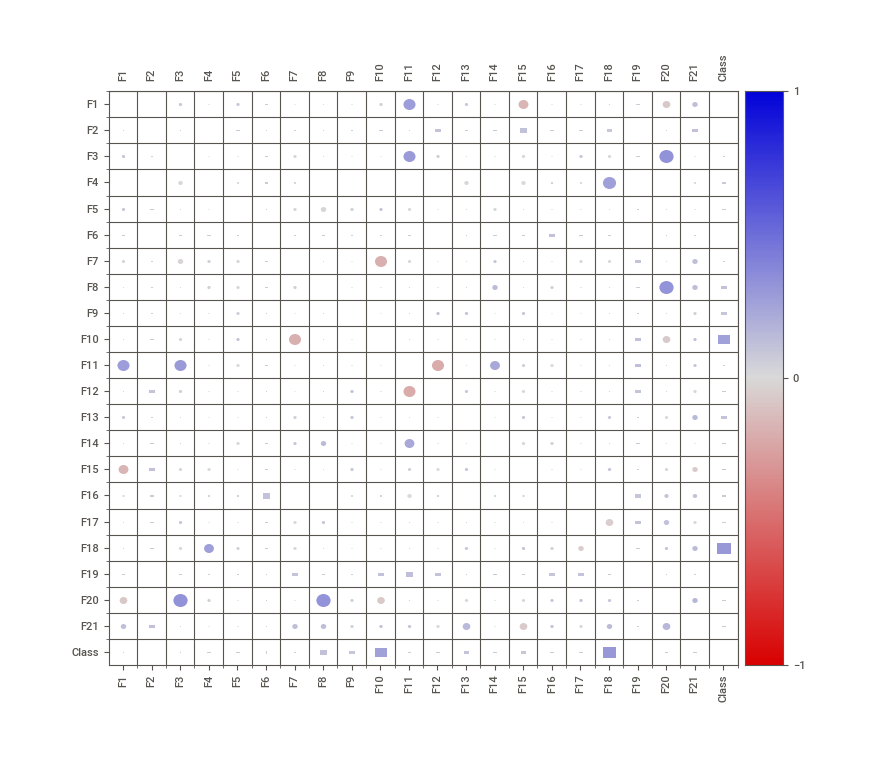
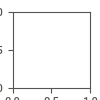

In [3]:
dataset = pd.read_csv('CE802_P2_Data.csv')
sv_analyze = sv.analyze(dataset)
sv_analyze.show_notebook()

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   int64  
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   int64  
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

In [5]:
#Transposing the matrix to modify

dataset.head(5).transpose()

,0,1,2,3,4
F1,13146.09,12317.79,13654.29,12713.67,17194.29
F2,0.72,1.72,0.72,1.72,1.72
F3,7435.16,7503.04,7709.4,7403.88,7446.12
F4,8.4494,7.7752,9.118,14.438,10.988
F5,-7.476,-6.6531,-5.5212,-4.4715,-6.2214
F6,0,0,1,0,0
F7,-12.4365,-17.376,-14.838,-11.3466,-12.6738
F8,-17.259,-23.109,-23.454,-14.433,-23.805
F9,-67.9,-64.01,-42.869,-38.565,-38.522
F10,-2964.93,-2936.4,-3005.28,-3043.26,-3477.56


In [6]:
#The data comprises of 22 Columns along with 1 as a target column 
#majority of the null values are in F21 

#The int type values from two columns are selected 


In [49]:
dataset["F6"].value_counts()

0    519
1    481
Name: F6, dtype: int64

In [50]:
dataset["F19"].value_counts()

1    507
0    493
Name: F19, dtype: int64

In [9]:
#Implimentation of the Decision tree model and the prediction will be done post training
#Spliting of dataset in 70-30 between train and set 

In [51]:
# Classification for dataset in features and target values
X = dataset.drop(columns=["Class","F21"])
y = dataset["Class"]

In [52]:
# Classifying the data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Implementation of the Decision tree model 
# Decision Tree model is taken becasue it is easy to understand and provides highly effective structure

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
decision_tree_train_predicitons = decision_tree_classifier.predict(X_train)
decision_tree_test_predictions = decision_tree_classifier.predict(X_test)

In [54]:
#Printing the Train and Test accuracy
#Printing confusion matrix

print(f"Decision Tree Train Accuracy {metrics.accuracy_score(y_train, decision_tree_train_predicitons)}")

print(f"Decision Tree Test Accuracy {metrics.accuracy_score(y_test, decision_tree_test_predictions)}")

print("#######-------Confusion Matrix-------#####")
print(metrics.confusion_matrix(y_test, decision_tree_test_predictions))

Decision Tree Train Accuracy 1.0
Decision Tree Test Accuracy 0.85
#######-------Confusion Matrix-------#####
[[119  24]
 [ 21 136]]


In [14]:
#The Model is behaving good according to the model prediction

# Check the dataset deeply and get the type of distribution

# It is known that there is asymmetry in columns and standardization should be implemented alongwith the new predictions by adding the column F21 with null values into datatset alongwith the inclu 


In [15]:
# Implementation of the simple imputer to add the data in place of null values.


In [55]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_col = imputer.fit_transform(dataset["F21"].values.reshape(-1,1))

In [17]:
# plotting distribution of obtained column

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'F21_Imputed_Dstplot'}, ylabel='Density'>

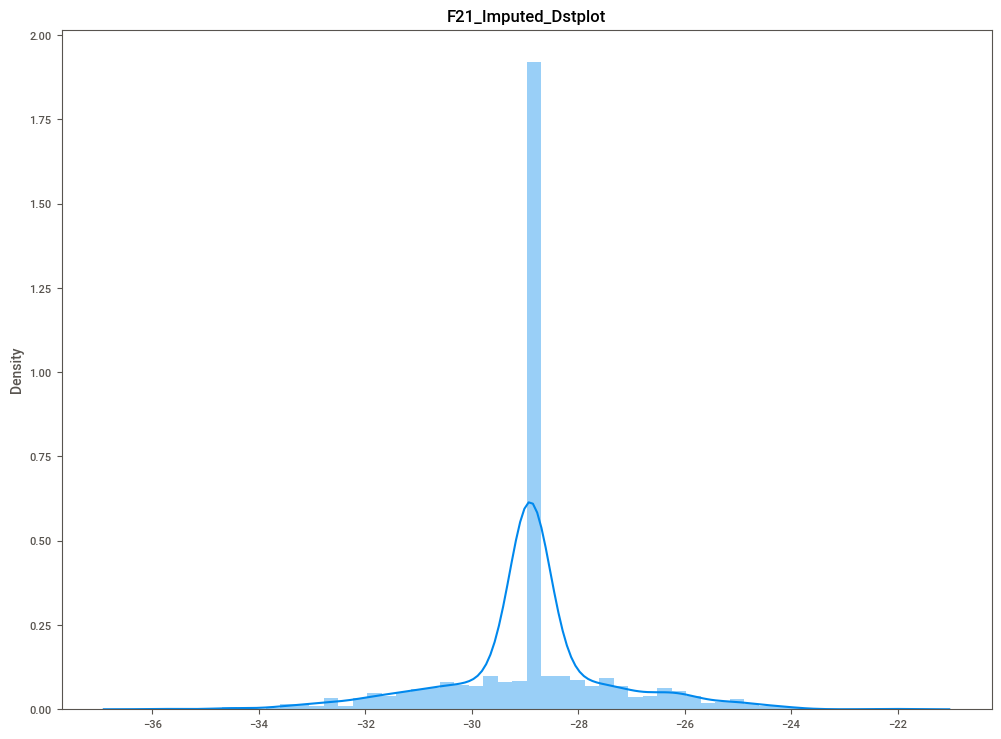

In [56]:
plt.figure(figsize=(12,9))
plt.title("F21_Imputed_Dstplot")
sns.distplot(imputed_col)

In [19]:
# Replacement of the column between the imputed and existing 

In [57]:
new_data_set = dataset.copy()
new_data_set["F21"] = imputed_col

In [58]:
# new_data_set splition into train and test from X and y 

X = new_data_set.drop(columns=["Class"])
y = new_data_set["Class"]

scaler = StandardScaler()
X = scaler.fit_transform(X)
min_max = MinMaxScaler()
X = min_max.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# To choose the best model, Implementation of four different models to check the accuracy

In [59]:
#Implementation of Decision Tree model

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
decision_tree_train_predicitons = decision_tree_classifier.predict(X_train)
decision_tree_test_predictions = decision_tree_classifier.predict(X_test)
print(f"Decision Tree Train Accuracy {metrics.accuracy_score(y_train, decision_tree_train_predicitons)}")
print(f"Decision Tree Test Accuracy {metrics.accuracy_score(y_test, decision_tree_test_predictions)}")

Decision Tree Train Accuracy 1.0
Decision Tree Test Accuracy 0.86


In [60]:
print("#######-------Confusion Matrix-------#####")
print(metrics.confusion_matrix(y_test, decision_tree_test_predictions))
print("#######-------Classification Report-------#####")
print(metrics.classification_report(y_test, decision_tree_test_predictions))

#######-------Confusion Matrix-------#####
[[76 13]
 [15 96]]
#######-------Classification Report-------#####
              precision    recall  f1-score   support

       False       0.84      0.85      0.84        89
        True       0.88      0.86      0.87       111

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [61]:
#Implementation of knn 

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_classifier_train_predicitons = knn_classifier.predict(X_train)
knn_classifier_test_predictions = knn_classifier.predict(X_test)
print(f"KNN Train Accuracy {metrics.accuracy_score(y_train, knn_classifier_train_predicitons)}")
print(f"KNN Test Accuracy {metrics.accuracy_score(y_test, knn_classifier_test_predictions)}")

KNN Train Accuracy 0.74375
KNN Test Accuracy 0.58


In [62]:
print("#######-------Confusion Matrix-------#####")
print(metrics.confusion_matrix(y_test, knn_classifier_test_predictions))
print("#######-------Classification Report-------#####")
print(metrics.classification_report(y_test, knn_classifier_test_predictions))

#######-------Confusion Matrix-------#####
[[49 40]
 [44 67]]
#######-------Classification Report-------#####
              precision    recall  f1-score   support

       False       0.53      0.55      0.54        89
        True       0.63      0.60      0.61       111

    accuracy                           0.58       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.58      0.58      0.58       200



In [63]:
#Implementation of svm

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_classifier_train_predicitons = svm_classifier.predict(X_train)
svm_classifier_test_predictions = svm_classifier.predict(X_test)
print(f"SVM Train Accuracy {metrics.accuracy_score(y_train, svm_classifier_train_predicitons)}")
print(f"SVM  Test Accuracy {metrics.accuracy_score(y_test, svm_classifier_test_predictions)}")

SVM Train Accuracy 0.75
SVM  Test Accuracy 0.705


In [64]:
print("#######-------Confusion Matrix-------#####")
print(metrics.confusion_matrix(y_test, svm_classifier_test_predictions))
print("#######-------Classification Report-------#####")
print(metrics.classification_report(y_test, svm_classifier_test_predictions))

#######-------Confusion Matrix-------#####
[[61 28]
 [31 80]]
#######-------Classification Report-------#####
              precision    recall  f1-score   support

       False       0.66      0.69      0.67        89
        True       0.74      0.72      0.73       111

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.71      0.70      0.71       200



In [65]:
#Implementation of Gradient boosting model 

gradient_boosting_classfier = GradientBoostingClassifier()
gradient_boosting_classfier.fit(X_train, y_train)
gradient_boosting_classfier_train_predicitons = gradient_boosting_classfier.predict(X_train)
gradient_boosting_classfier_test_predictions = gradient_boosting_classfier.predict(X_test)
print(f"Gradient Boosting Train Accuracy {metrics.accuracy_score(y_train, gradient_boosting_classfier_train_predicitons)}")
print(f"Gradient Boosting Test Accuracy {metrics.accuracy_score(y_test, gradient_boosting_classfier_test_predictions)}")

Gradient Boosting Train Accuracy 0.97375
Gradient Boosting Test Accuracy 0.92


In [66]:
print("#######-------Confusion Matrix-------#####")
print(metrics.confusion_matrix(y_test, gradient_boosting_classfier_test_predictions))
print("#######-------Classification Report-------#####")
print(metrics.classification_report(y_test, gradient_boosting_classfier_test_predictions))

#######-------Confusion Matrix-------#####
[[ 81   8]
 [  8 103]]
#######-------Classification Report-------#####
              precision    recall  f1-score   support

       False       0.91      0.91      0.91        89
        True       0.93      0.93      0.93       111

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [31]:
#Here, I will be using the gradient boosting model for prediction alongwith the kfold cross validation to understand the model's learning capability  



In [69]:
final_gradient_boosting_classifier = GradientBoostingClassifier()
final_gradient_boosting_classifier.fit(X,y)
cross_validator = cross_validate(estimator=final_gradient_boosting_classifier, X=X, y=y,cv=10)

In [70]:
cross_validator

{'fit_time': array([0.32996798, 0.3350091 , 0.32892799, 0.32863688, 0.33776474,
        0.33124399, 0.32905912, 0.34149218, 0.32788587, 0.33656812]),
 'score_time': array([0.00062823, 0.00049186, 0.00051117, 0.00045514, 0.00050831,
        0.00057793, 0.00046897, 0.0005157 , 0.00043917, 0.0005219 ]),
 'test_score': array([0.86, 0.8 , 0.85, 0.89, 0.85, 0.87, 0.82, 0.9 , 0.84, 0.84])}

In [34]:
# The performance of the model is perfect with good test score 

### Part B

In [71]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Loading the test data file 

test_datafile = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy

test_data_set = test_datafile.iloc[:,:-1].copy()
test_data_imputed_column = imputer.fit_transform(test_data_set["F21"].values.reshape(-1,1))
test_data_set["F21"] = test_data_imputed_column
test_data_set = scaler.fit_transform(test_data_set)
test_data_set = min_max.fit_transform(test_data_set)

predicted = gradient_boosting_classfier.predict(test_data_set) 
# CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction

test_datafile.iloc[:,-1] = predicted

# Save to the destination file
test_datafile.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])